# Математическая статистика (ФБМФ, ФЭФМ)
## Семинар 2

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

## **Задача 1.**
Нарисовать график функций $y = 1/x$ и $y = -1/x$ на отрезке $[1, 10]$ и закрасить область между ними.

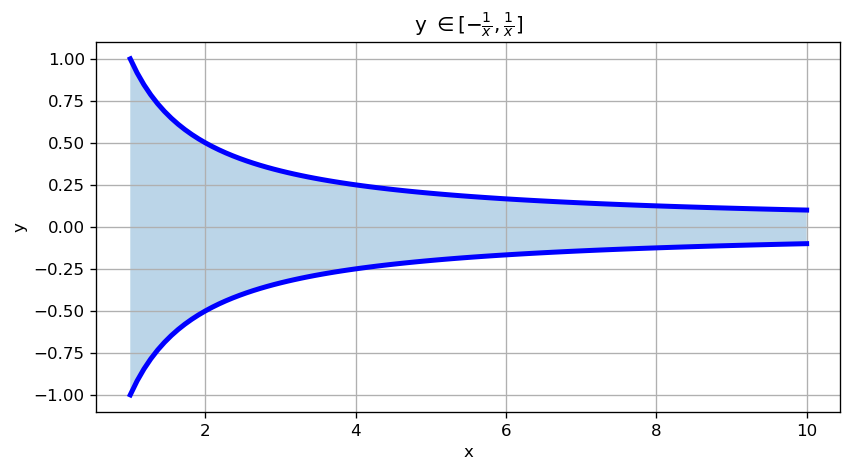

In [2]:
# создаем множество х от 1 до 10, 100 значений
grid = np.linspace(1, 10, 100)

# рисуем график
plt.figure(figsize=(8, 4), dpi=120)
plt.plot(grid, 1/grid, color='blue', lw=3)
plt.plot(grid, -1/grid, color='blue', lw=3)
plt.fill_between(grid, -1/grid, 1/grid, alpha=0.3)
plt.ylabel('y', fontsize=10)
plt.xlabel('x', fontsize=10)
plt.title(r'y $\in [-\frac{1}{x}, \frac{1}{x}]$')
plt.grid()
plt.show()

## **Задача 2.**
Нарисовать график плотности и функции распределения $\mathcal{N}(0, 1)$.

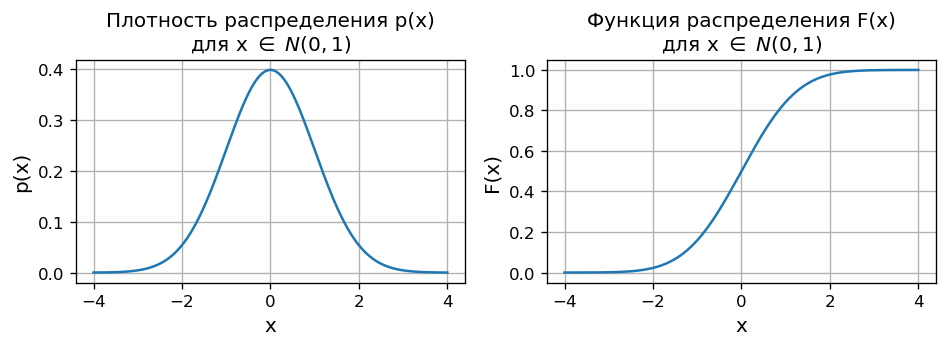

In [3]:
# создаем симметричную сетку параметров
grid = np.linspace(-4, 4, 500)

plt.figure(figsize=(8, 3), dpi=120)

# добавляем график плотности распределения
plt.subplot(1, 2, 1)
plt.title(f'Плотность распределения р(x)\nдля x $\in$ $N(0, 1)$', fontsize=12)
plt.plot(grid, sps.norm(loc=0, scale=1).pdf(grid))
plt.xlabel('x', fontsize=12)
plt.ylabel('p(x)', fontsize=12)
plt.grid()

# добавляем график функции распределения
plt.subplot(1, 2, 2)
plt.title(f'Функция распределения F(x)\nдля x $\in$ $N(0, 1)$', fontsize=12)
plt.plot(grid, sps.norm(loc=0, scale=1).cdf(grid))
plt.xlabel('x', fontsize=12)
plt.ylabel('F(x)', fontsize=12)
plt.grid()

plt.tight_layout();

## **Задача 3.**
Пусть $z_{\alpha}$ &mdash; $\alpha$-квантиль распределения $\mathcal{N}(0, 1)$. Нарисовать зависимость $z_{\alpha}$ от $\alpha$.

Квантили распределений вычисляются с помощью метода `ppf`, например, $z_p = F^{-1}_X(p) =$ `sps.norm.ppf(p)`.

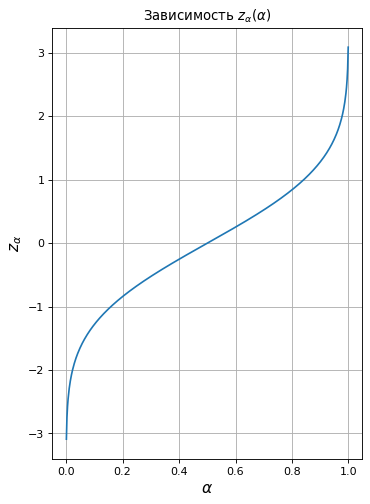

In [4]:
# создаем множество значений \alpha
grid = np.linspace(0.001, 0.999, 500)

# строим график
plt.figure(figsize=(5, 7), dpi=80)
plt.title(r'Зависимость $z_{\alpha}(\alpha)$')
plt.plot(grid, sps.norm(loc=0, scale=1).ppf(grid))
plt.ylabel('$z_{\\alpha}$', fontsize=14)
plt.xlabel(r'$\alpha$', fontsize=14)
plt.grid();

## Проверка статистических гипотез

_Примечание:_ Если не сказано иного, считаем уровень значимости $\alpha = 0.05$. **Не путать** с уровнем доверия.

### Критерий согласия Колмогорова

$X_1, ..., X_n$ &mdash; выборка с неизвестной функцией распределения $F$.

$\mathsf{H}_0\colon F=F_0$

$\mathsf{H}_1\colon F=F_1$

`kstest(rvs, cdf, args=())`

Аргументы:

* `rvs` &mdash; выборка;
* `cdf` &mdash; функция распределения (сама функция или ее название);
* `args` &mdash; параметры распределения.

Возвращает:

* `statistic` &mdash; статистика критерия;
* `pvalue` &mdash; число, которое имеет следующий смысл: если меньше уровня значимости $\alpha$, то гипотеза $\mathsf{H}_0$ отвергается, в противном случае гипотеза $\mathsf{H}_0$ не отвергается.

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest">Документация</a>

In [5]:
sps.kstest(sps.norm.rvs(size=100), cdf=sps.norm.cdf)

KstestResult(statistic=0.0996131030404438, pvalue=0.256677253088624, statistic_location=-0.12468391256301148, statistic_sign=1)

Так как p-value > $\alpha$, не отвергаем $\mathsf{H}_0\colon F = F_{\mathcal{N}(0, 1)}$ на уровне значимости $\alpha = 0.05$.

In [6]:
sps.kstest(sps.norm(loc=10).rvs(size=100), cdf=sps.norm.cdf)

KstestResult(statistic=0.9999999999999956, pvalue=0.0, statistic_location=7.754361919836154, statistic_sign=-1)

Так как p-value < $\alpha$, отвергаем $\mathsf{H}_0\colon F = F_{\mathcal{N}(0, 1)}$ на статистически значимом уровне.

In [7]:
sps.kstest(sps.uniform.rvs(size=100), cdf=sps.norm.cdf)

KstestResult(statistic=0.5015764139689277, pvalue=8.458720644389862e-24, statistic_location=0.003951494110319587, statistic_sign=-1)

Так как p-value < $\alpha$, отвергаем $\mathsf{H}_0\colon F = F_{\mathcal{N}(0, 1)}$, статистически значимый результат на уровне $\alpha = 0.05$.

### Критерий Шапиро-Уилка

$X_1, ..., X_n$ &mdash; выборка.

$\mathsf{H}_0\colon$ выборка из нормального распределения с произвольными параметрами;

$\mathsf{H}_1\colon$ выборка не из нормального распределения.

`shapiro(x)`

Аргументы:

* `x` &mdash; выборка.

Возвращает:

* `W` &mdash; статистика критерия;
* `pvalue` &mdash; число, которое имеет следующий смысл: если меньше уровня значимости $\alpha$, то гипотеза $\mathsf{H}_0$ отвергается, в противном случае гипотеза $\mathsf{H}_0$ не отвергается.

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro">Документация</a>

In [8]:
sps.shapiro(sps.norm.rvs(size=100))

ShapiroResult(statistic=0.9761927723884583, pvalue=0.066911481320858)

Значение p-value > $\alpha$, поэтому не отвергаем $\mathsf{H}_0\colon X_1, ..., X_n$ &mdash; выборка из нормального распределения, на уровне значимости $\alpha = 0.05$.

In [9]:
sps.shapiro(sps.norm(loc=20, scale=100).rvs(size=100))

ShapiroResult(statistic=0.9702478647232056, pvalue=0.023092743009328842)

Значение p-value < $\alpha$, поэтому отвергаем $\mathsf{H}_0\colon X_1, ..., X_n$ &mdash; выборка из нормального распределения. Совершили ошибку при тестировании гипотезы.

In [10]:
sps.shapiro(sps.uniform.rvs(size=100))

ShapiroResult(statistic=0.9226810336112976, pvalue=1.9584580513765104e-05)

### Критерий Смирнова

$X_1, ..., X_n$ и $Y_1, ..., Y_m$ &mdash; независимые выборки (возможно разных размеров), имеющие непрерывные функции распределения $F$ и $G$ соответственно.

$\mathsf{H}_0\colon F = G$

$\mathsf{H}_1\colon F \not= G$

`ks_2samp(data1, data2)`

Аргументы:

* `data1` и `data2` &mdash; выборки.

Возвращает:

* `statistic` &mdash; статистика критерия;
* `pvalue` &mdash; число, которое имеет следующий смысл: если меньше уровня значимости $\alpha$, то гипотеза $\mathsf{H}_0$ отвергается, в противном случае гипотеза $\mathsf{H}_0$ не отвергается.

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp">Документация</a>

In [11]:
sps.ks_2samp(sps.norm(loc=0).rvs(size=100), sps.norm(loc=0).rvs(size=200))

KstestResult(statistic=0.12, pvalue=0.2853697742641565, statistic_location=0.388541127905846, statistic_sign=-1)

**Не отвергаем** $\mathsf{H}_0\colon F = G$ на уровне значимости $\alpha = 0.05$, так как p-value $> \alpha$.

In [12]:
sps.ks_2samp(sps.norm(loc=0).rvs(size=100), sps.norm(loc=1).rvs(size=200))

KstestResult(statistic=0.44, pvalue=4.824655068081178e-12, statistic_location=0.7488902347493329, statistic_sign=1)

In [13]:
sps.ks_2samp(sps.norm.rvs(size=100), sps.uniform.rvs(size=100))

KstestResult(statistic=0.56, pvalue=8.771130313572204e-15, statistic_location=0.002915206344755177, statistic_sign=1)

Отвергаем $\mathsf{H}_0\colon F = G$ на уровне значимости $\alpha = 0.05$, так как p-value $< \alpha$.

### T-критерий Стьюдента &mdash; независимые выборки

Даны две независимые выборки, возможно разных размеров

$X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$

$Y_1, ..., Y_m \sim \mathcal{N}(a_2, \sigma_2^2)$

то есть элементы $X_i$ и $Y_j$ независимы.

$\mathsf{H}_0\colon a_1 = a_2$

$\mathsf{H}_1\colon a_1 \not= a_2$ 

`ttest_ind(a, b, equal_var=True)`

Аргументы:

* `a` и `b` &mdash; выборки;
* `equal_var` &mdash; известно ли равенство дисперсий, то есть можно ли считать, что $\sigma_1=\sigma_2$, по дефолту `True`.

Возвращает:

* `statistic` &mdash; статистика критерия;
* `pvalue` &mdash; число, которое имеет следующий смысл: если меньше уровня значимости $\alpha$, то гипотеза $\mathsf{H}_0$ отвергается, в противном случае гипотеза $\mathsf{H}_0$ не отвергается.

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind">Документация</a>

In [14]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sps.norm(loc=1).rvs(size=150)
sps.ttest_ind(sample_1, sample_2)

Ttest_indResult(statistic=-4.9321450371734725, pvalue=1.4911895067635886e-06)

Получили p-value < $\alpha$, отвергаем $\mathsf{H}_0\colon a_1 = a_2$ на уровне значимости $\alpha = 0.05$.

In [15]:
sample_1 = sps.norm(loc=0).rvs(size=50)
sample_2 = sps.norm(loc=1, scale=7).rvs(size=100)
sps.ttest_ind(sample_1, sample_2, equal_var=False)

Ttest_indResult(statistic=-3.8895393543220758, pvalue=0.0001730334966294471)

### T-критерий Стьюдента &mdash; связные выборки

Даны две связные выборки

$X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$

$Y_1, ..., Y_n \sim \mathcal{N}(a_2, \sigma_2^2)$

то есть элементы $X_i$ и $Y_i$ могут быть зависимы.

$\mathsf{H}_0\colon a_1 = a_2$

$\mathsf{H}_1\colon a_1 \not= a_2$ 

`ttest_rel(a, b)`

Аргументы:

* `a` и `b` &mdash; выборки.

Возвращает:

* `statistic` &mdash; статистика критерия;
* `pvalue` &mdash; число, которое имеет следующий смысл: если меньше уровня значимости $\alpha$, то гипотеза $\mathsf{H}_0$ отвергается, в противном случае гипотеза $\mathsf{H}_0$ не отвергается.

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel">Документация</a>

In [16]:
sample_1 = sps.norm(loc=0).rvs(size=100)
sample_2 = sample_1 + sps.norm(loc=0, scale=0.5).rvs(size=100)
sps.ttest_rel(sample_1, sample_2)

TtestResult(statistic=-1.185043597334321, pvalue=0.23883711277933437, df=99)

Не отвергаем $\mathsf{H}_0\colon a_1 = a_2$ на уровне значимости $\alpha = 0.05$, так как полученное значение p-value $> \alpha$.